In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# 1) Метод половинного деления

In [2]:
f = lambda x: -((5 * x )/(1 + x * x)) + 2 * np.cos(2 * x) - 1
f1 = np.vectorize(f)

In [3]:
y = np.arange(-1.5, -1, 0.01)

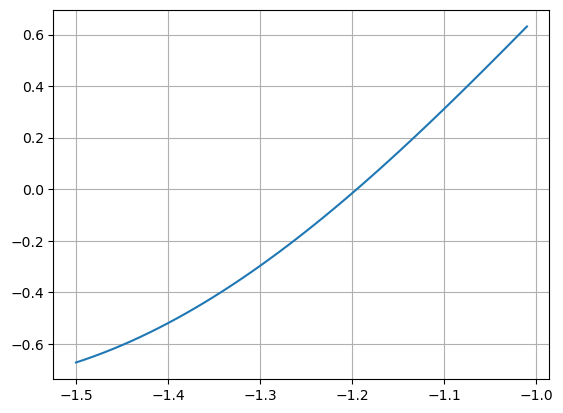

In [212]:
plt.plot(y, f1(y))
plt.grid()
plt.show()

In [5]:
eps = 0.001
b = -1.0 
a = -1.5
c = 0

In [6]:
while np.abs((b - a)) > eps:
    c = (a + b) / 2
    if f(a) * f(c) < 0:
        b = c
    else :
        a = c

In [7]:
c

-1.1943359375

In [8]:
f(c)

0.0016989184210409736

In [9]:
fsolve(f1, (-1.5, -1.0))

array([-1.19488468, -1.19488468])

# 2) Метод Ньютона–Рафсона (касательных)

In [260]:
x = sp.Symbol('x')

In [261]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [262]:
a = -1.5
b = -1.0

In [269]:
eps = 0.001
x0 = (a + b) / 2
x1 = x0 + 2 * eps

In [274]:
d = sp.diff(f)
while(np.abs((x1 - x0)) > eps):
    x0 = x1
    x1 = x0 - f.subs(x, x0)/d.subs(x, x0)
x1

-1.19488468380594

In [276]:
f.subs(x, x1), f.subs(x, x1) < eps

(4.80429029892093e-11, True)

# 3) Метод секущих (хорд)

In [336]:
x = sp.Symbol('x')

In [337]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [338]:
y = np.arange(-1.5, -1, 0.01)

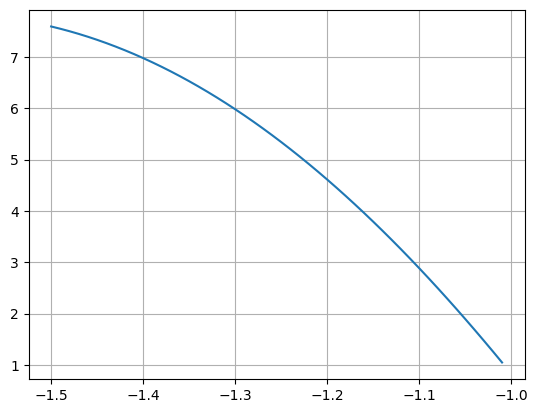

In [339]:
d = sp.diff(f)
dd = sp.diff(d)
f2 = sp.lambdify(x, dd)

plt.plot(y, f2(y))
plt.grid()
plt.show()

In [340]:
a = -1.5
b = -1.0

In [341]:
eps = 0.001
x0 = a
x1 = x0 + 2 * eps

In [342]:
d = sp.diff(f)
while(np.abs((x1 - x0)) > eps):
    x0 = x1
    x1 = x0 - f.subs(x, x0)/(f.subs(x, b) - f.subs(x, x0))*(b - x0)
x1

-1.19493995672502

In [359]:
f.subs(x, x1), f.subs(x, x1) < eps

(-0.000171049303562487, True)

# 4) Комбинированный метод

In [398]:
x = sp.Symbol('x')

In [399]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [401]:
a = -1.5
b = -1.0

In [402]:
eps = 0.001
x0 = a
x1 = x0 + 2 * eps
x_0 = b
x_1 = x_0 - 2* eps

In [403]:
d = sp.diff(f)
while(np.abs((x1 - x0)) > eps):
    x0 = x1
    x1 = x0 - f.subs(x, x0)/(f.subs(x, b) - f.subs(x, x0))*(b - x0)
    x_0 = x_1
    x_1 = x_0 - f.subs(x, x_0)/d.subs(x, x_0)
solution = (x1 + x_1) / 2

In [404]:
f.subs(x, solution), f.subs(x, solution) < eps

(-8.55263821395447e-5, True)

# 5) Метод простых итераций

In [289]:
x = sp.Symbol('x')

In [290]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [291]:
lambd = -0.02

In [292]:
phi = x + lambd * f

In [293]:
y = np.arange(-1.5, -1.0, 0.01)

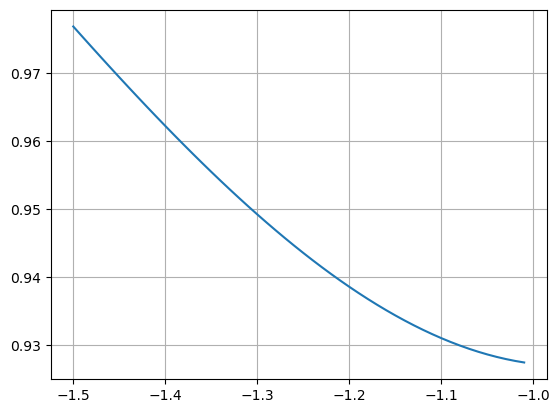

In [294]:
d = np.abs(sp.diff(phi))
#f1 = sp.lambdify(x, phi)
f2 = sp.lambdify(x, d)

plt.plot(y, f2(y))
plt.grid()
plt.show()

In [295]:
a = -1.5
b = -1.0
q = d.subs(x, -1.5)

In [296]:
eps = 0.001
x0 = (a + b) / 2
#x1 = x0 + 2 * eps
x1 = phi.subs(x, x0)

In [297]:
while(q * np.abs(x0 - x1) / (1 - q) > eps):
    x0 = x1
    x1 = phi.subs(x, x0)
x1

-1.19491952706180

In [298]:
'{:.3f}'.format(f.subs(x, x1)), np.abs(float('{:.3f}'.format(f.subs(x, x1)))) <= eps

('-0.0001', True)

# 6) Метод Ньютона 

In [204]:
from sympy.matrices import Matrix

In [205]:
x, y = sp.symbols("x, y")

In [206]:
f1 = sp.sin(x + sp.pi/2) + y - 1.5
f2 = sp.cos(y + sp.pi/2 - 0.5) + 2 * x - 1

In [207]:
df1x = sp.diff(f1, x)
df1y = sp.diff(f1, y)
df2x = sp.diff(f2, x)
df2y = sp.diff(f2, y)
df1x, df1y, df2x, df2y

(-sin(x), 1, 2, -cos(y - 0.5))

In [208]:
I = Matrix([[df1x, df1y],[df2x, df2y]])
I

Matrix([
[-sin(x),             1],
[      2, -cos(y - 0.5)]])

In [209]:
eps = 0.001
x0 = Matrix([0, 0])
x1 = Matrix([2 * eps, 2 * eps])
f = Matrix([f1, f2])

In [210]:
while((np.abs(x1[0] - x0[0]) > eps) and np.abs((x1[1] - x0[1])) > eps):
    x0 = x1
    x1 = x0 - (I.subs({x:x0[0], y:x0[1]}).inv()) * f.subs({x:x0[0], y:x0[1]})
x1

Matrix([
[ 0.58192615175504],
[0.664594478362832]])

In [211]:
f.subs({x:x0[0], y:x0[1]})

Matrix([
[-2.48491398713302e-6],
[ 2.52476526380052e-6]])

# 7) Метод спуска

In [331]:
from sympy.matrices import Matrix

In [332]:
x, y = sp.symbols("x, y")

In [333]:
f1 = sp.sin(x + sp.pi/2) + y - 1.5
f2 = sp.cos(y + sp.pi/2 - 0.5) + 2 * x - 1
f = Matrix([f1, f2])

In [334]:
phi = f1 * f1 + f2 * f2

In [335]:
d_phi_x = sp.diff(phi, x)
d_phi_y = sp.diff(phi, y)
grad = Matrix([d_phi_x, d_phi_y])

In [336]:
eps = 0.001
alpha = 0.5
x0 = Matrix([0, 0])
x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})

In [337]:
while(phi.subs({x:x1[0], y:x1[1]}) > (2 * eps * eps)):
    if phi.subs({x:x1[0], y:x1[1]}) < phi.subs({x:x0[0], y:x0[1]}):
        x0 = x1
        x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})
    else:
        alpha /= 2
        x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})
        print('alpha = ', alpha)
x1

alpha =  0.25
alpha =  0.125


Matrix([
[0.580671552761276],
[0.662633563837484]])

In [338]:
f1.subs({x:x1[0], y:x1[1]}), f2.subs({x:x1[0], y:x1[1]})

(-0.00127200182292209, -0.000574471671186683)

# 8) Решение линейных уравнений с помощью системы Штурма

In [3]:
x = sp.symbols("x")

#f = x**3 + 3 * x**2 - 1
#f = 4 * x**3 - 4 * x**2 - 7 * x - 2
#f = 2*x**4 + 5*x**2-3 
#f = x**4 + 3 * x**3 + 3 * x**2 -x - 6
#f = x**4 - 12*x**2 - 16*x - 4
f = sp.expand((x -3)*(x + 4)*(x-1)*(x+5)*(x+6)*(x-9)*(x-4))

f_poly = sp.Poly(f, x)
f

x**7 - 2*x**6 - 90*x**5 + 44*x**4 + 2057*x**3 - 1002*x**2 - 13968*x + 12960

In [4]:
df = sp.diff(f, x)

In [7]:
# Деление многочленов для системы Штурма

def div(f_list, f, df):
    f_0 = f
    f_1 = df
    while True:
        r = sp.div(f_0, f_1, domain='QQ')[1]
        if r != 0:
            f_0, f_1 = f_1, (-r)
            f_list.append(-r)
        else:
            return f_list

In [10]:
f_list = [f, df]
f_list = div(f_list, f, df)
solution = list()
last = f_list[-1]

# Проверка кратного корня, если последний элемент не число, то корень кратный. Записываем в отдельный массив решений.
if sp.diff(last) != 0:
    solution.append(sp.solve(last, x)[0])
    f_list = [sp.div(i, last, domain='QQ')[0] for i in f_list]
    
f_list, solution

([x**7 - 2*x**6 - 90*x**5 + 44*x**4 + 2057*x**3 - 1002*x**2 - 13968*x + 12960,
  7*x**6 - 12*x**5 - 450*x**4 + 176*x**3 + 6171*x**2 - 2004*x - 13968,
  1284*x**5/49 - 24*x**4/49 - 57948*x**3/49 + 22728*x**2/49 + 590664*x/49 - 607104/49,
  1537669*x**4/11449 + 5536412*x**3/11449 - 36189881*x**2/11449 - 77461552*x/11449 + 224171472/11449,
  10828965849384*x**3/48253590889 + 21626103295584*x**2/48253590889 - 166793356699464*x/48253590889 - 69304459947264/48253590889,
  27071348360887548718000*x**2/17782136080408062169 + 46042281222698593817600*x/17782136080408062169 - 372682541048149393832400/17782136080408062169,
  1725865560047680460635416336*x/3594059886762333186673475 + 1872090198893205604818563616/3594059886762333186673475,
  27056736292980801017130042250000/1231218049138953113249939929],
 [])

In [12]:
# Оценка интервала поиска корней

coeffs_of_f = f_poly.coeffs()

R = 1 +  max(list(map(lambda x: abs(x), coeffs_of_f))) / abs(coeffs_of_f[0])
R_min, R_max = -math.ceil(R), math.ceil(R)
R_min, R_max

(-13969, 13969)

In [14]:
# Поиск числа перемен знака на концах интервала и их сравнение

def w_search(a, b):
    first_array_of_sign = [i.subs({x : a}) for i in f_list]
    second_array_of_sign = [i.subs({x : b}) for i in f_list]

    while 0 in first_array_of_sign:
        first_array_of_sign.remove(0)
            
    while 0 in second_array_of_sign:
        second_array_of_sign.remove(0)
    
    
    first_w = 0
    for i in range(len(first_array_of_sign) - 1):
        if first_array_of_sign[i] * first_array_of_sign[i + 1] < 0:
            first_w += 1
            
    second_w = 0
    for i in range(len(second_array_of_sign) - 1):
        if second_array_of_sign[i] * second_array_of_sign[i + 1] < 0:
            second_w += 1
            
    return abs(first_w - second_w)

In [15]:
# Список интервалов

intervals_list = [[R_min, R_max]]

In [16]:
# Поиск интервалов, на которых будет находится ровно один корень многочлена

interval_sol = list()
while len(intervals_list) != 0:
    interval = intervals_list[0]
    w = w_search(interval[0], interval[1])
    if w == 1:
        interval_sol.append(interval)
        intervals_list.pop(0)
    elif w == 0:
        intervals_list.pop(0)
    else:
        div_number = (interval[0] + interval[1]) / 2
        intervals_list.append([interval[0], div_number])
        intervals_list.append([div_number, interval[1]])
        intervals_list.pop(0)
interval_sol

[[13969/2048, 13969/1024],
 [13969/4096, 13969/2048],
 [-13969/2048, -41907/8192],
 [0, 13969/8192],
 [13969/8192, 13969/4096],
 [-41907/8192, -69845/16384],
 [-69845/16384, -13969/4096]]

In [17]:
# Метод Ньютона–Рафсона (касательных) для нахождения корней на интервале

def NR_method(f, a, b):
    eps = 0.00001
    x0 = (a + b) / 2
    x1 = x0 + 2 * eps
    
    d = sp.diff(f)
    while(abs((x1 - x0)) > eps):
        x0 = x1
        x1 = x0 - f.subs(x, x0)/d.subs(x, x0)
    return x1

In [18]:
# Действиетльные корни многочлена f

for interval in interval_sol:
    solution.append(NR_method(f, interval[0], interval[1]))
solution

[9.00000000000000,
 4.00000000001526,
 -6.00000000014155,
 1.00000000000000,
 3.00000000000000,
 -5.00000000000736,
 -3.99999999999999]

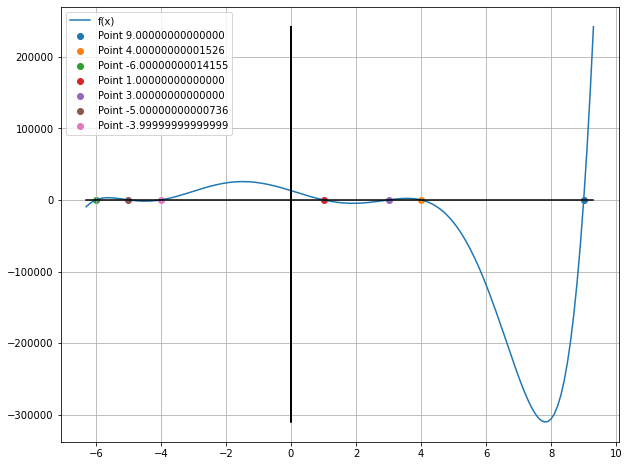

In [19]:
f_lam = sp.lambdify(x, f)

fig, ax = plt.subplots()

a = min(solution) - 0.3
b = max(solution) + 0.3
x_num = np.arange(a, b, 0.1)

plt.plot(x_num, f_lam(x_num), label='f(x)')
plt.plot(x_num, [0] * f_lam(x_num), c='black')
plt.plot([0] * f_lam(x_num), f_lam(x_num), c='black')

for i in solution:
    plt.scatter(i, f_lam(i), label=f'Point {i}')

plt.legend()
plt.grid()

fig.set_figwidth(10) 
fig.set_figheight(8)

plt.show()